In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
%load_ext lab_black
pd.set_option("display.max_columns", None)

The features: \
**customer_id :** id of the credit card holder\
**balance_account :** balance amount left in the account to make purchases at the end of the 6-month period\
**purchases_amount :** amount of purchases made from account\
**paid_advance :** number of transactions made with “Cash in Advance” method\
**full_purchases :** maximum purchase amount done in full payment\
**balance_frequency_update :** how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)\
**installments :** amount of purchases done in installments\
**purchases_frequency :** how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)\
**full_purchases_frequency :** how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)\
**purchases_installments_frequency :** how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)\
**cash_advance_frequency :** how frequently the cash in advance being paid\
**nr_cash_advances :** cash in advance given by the user\
**nr_purchases :** number of purchase transactions made\
**credit_limit :** limit of credit card for user\
**fixed_rate_period :** duration of fixed interest rate of credit card service for user (in months)\
**payments :** amount of payment done by user\
**min_payments :** minimum amount of payments made by user\
**full_payment_prc :** percent of full payment paid by user

In [3]:
path = "../../../data/card_transactions.csv"
df = pd.read_csv(path, na_values=["?", ""])
df

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000
8498,Ox7ETtYHjE2uo4Xo,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


In [4]:
df.info()  # there is missin data in credit_limit and min_payments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [5]:
df.set_index("customer_id", inplace=True)

In [6]:
# impute missing numerical values with knn
num_cols = df.columns
knn_imp = KNNImputer(n_neighbors=5)
df = pd.DataFrame(knn_imp.fit_transform(df), columns=num_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   8500 non-null   float64
 1   purchases_amount                  8500 non-null   float64
 2   paid_advance                      8500 non-null   float64
 3   full_purchases                    8500 non-null   float64
 4   balance_frequency_update          8500 non-null   float64
 5   installments                      8500 non-null   float64
 6   purchases_frequency               8500 non-null   float64
 7   full_purchases_frequency          8500 non-null   float64
 8   purchases_installments_frequency  8500 non-null   float64
 9   cash_advance_frequency            8500 non-null   float64
 10  nr_cash_advances                  8500 non-null   float64
 11  nr_purchases                      8500 non-null   float64
 12  credit

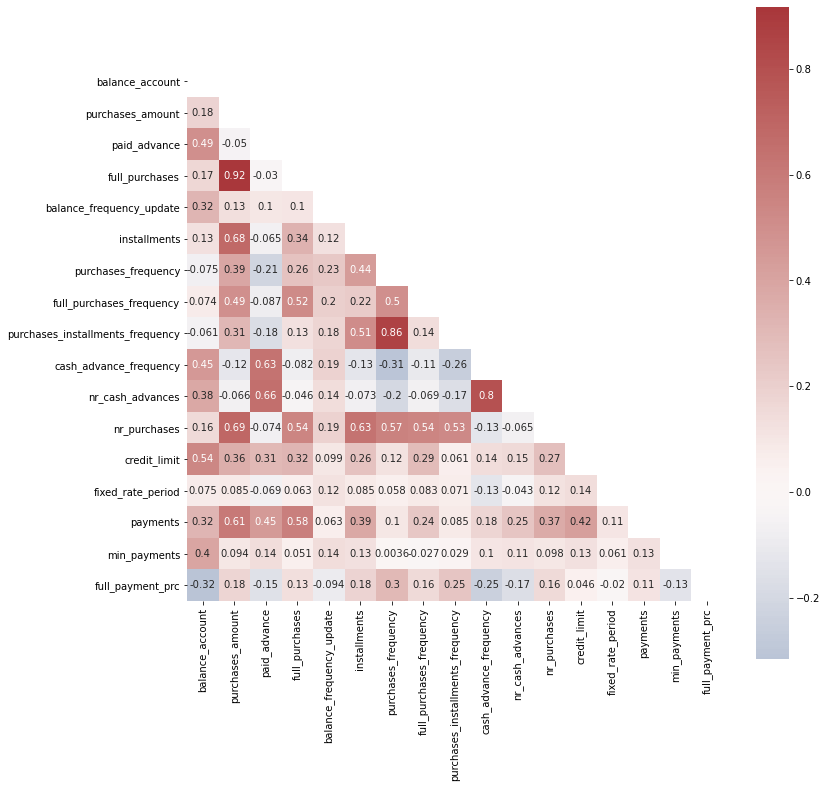

In [7]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, mask=mask, square=True, cmap="vlag", center=0, annot=True)

In [8]:
# drop variables that are correlated higher than 0.85
corr_upper = np.triu(corr, k=1)
idx = corr[(abs(corr_upper) > 0.85).any(axis=1)].index
df.drop(idx, axis=1, inplace=True)
df.columns

Index(['balance_account', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'full_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'nr_cash_advances', 'nr_purchases', 'credit_limit', 'fixed_rate_period',
       'payments', 'min_payments', 'full_payment_prc'],
      dtype='object')

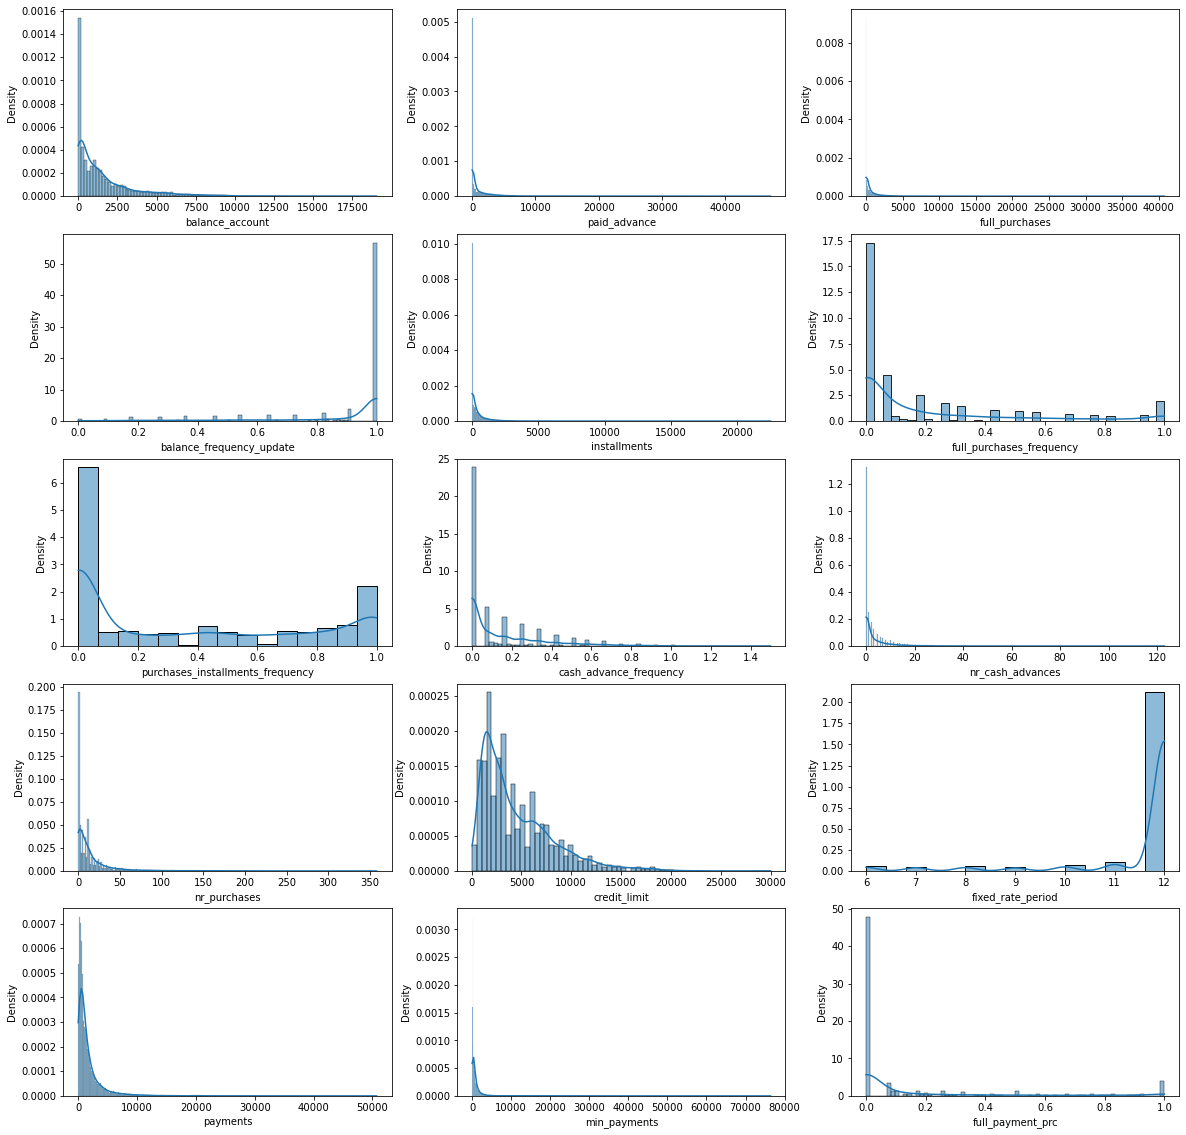

In [9]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.histplot(ax=ax, data=df, x=name, kde=True, stat="density")

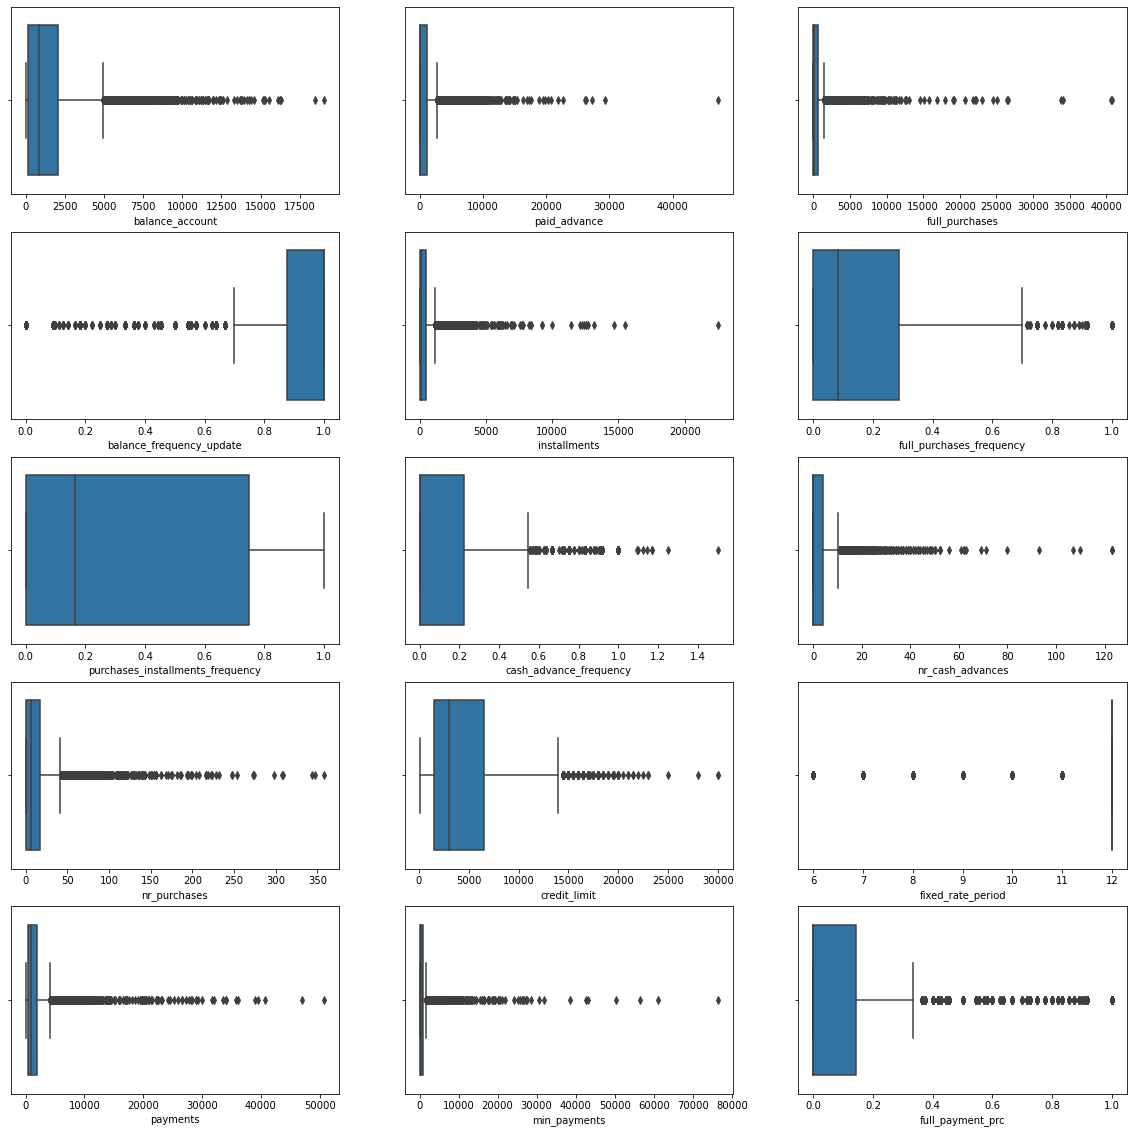

In [10]:
fig, axs = plt.subplots(5, 3, sharex=False, sharey=False, figsize=(20, 20))
for index, name in enumerate(df.columns):
    col = index % 3
    row = (index - col) // 3
    ax = axs[row][col]
    sns.boxplot(ax=ax, data=df, x=name)